P28 (). Queremos saber donde vive alguno de nuestros usuarios, para los usuarios que tiene más de 50 registros a negocios distintos en la tabla reviews obtenga el promedio y desviación estándar de la latitud y longitud de los negocios que calificaron (contando cada negocio una sola vez). Para el usuario que menos desviación estándar sumada tenga de ambas coordenadas muestre ese promedio y dónde está eso (https://www.gps-coordinates.net/) y cómo se llama el usuario para después irlo a buscar a la casa.

In [1]:
import pandas as pd


In [2]:
review = pd.read_csv("review.csv", usecols = ["user_id" , "business_id"])
review


,user_id,business_id
0,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw
1,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ
2,RreNy--tOmXMl1en0wiBOg,cPepkJeRMtHapc_b2Oe_dw
3,Jha0USGDMefGFRLik_xFQg,bMratNjTG5ZFEA6hVyr-xQ
4,4hBhtCSgoxkrFgHa4YAD-w,bbEXAEFr4RYHLlZ-HFssTA
...,...,...
3838100,_XVdmFWSgTN6YlojUxixTA,6WaI-IN8ql0xpEKlb4q8tg
3838101,Zo0th2m8Ez4gLSbHftiQvg,2vLksaMmSEcGbjI5gywpZA
3838102,mm6E4FbCMwJmb7kPDZ5v2Q,R1khUUxidqfaJmcpmGd4aw
3838103,YwAMC-jvZ1fvEUum6QkEkw,Rr9kKArrMhSLVE9a53q-aA


In [3]:
business = pd.read_csv("business.csv", usecols=["business_id", "latitude", "longitude"])
business

,business_id,latitude,longitude
0,Pns2l4eNsfO8kk83dixA6A,34.426679,-119.711197
1,mpf3x-BjTdTEA3yCZrAYPw,38.551126,-90.335695
2,tUFrWirKiKi_TAnsVWINQQ,32.223236,-110.880452
3,MTSW4McQd7CbVtyjqoe9mw,39.955505,-75.155564
4,mWMc6_wTdE0EUBKIGXDVfA,40.338183,-75.471659
...,...,...,...
150341,IUQopTMmYQG-qRtBk-8QnA,53.468419,-113.492054
150342,c8GjPIOTGVmIemT7j5_SyQ,36.115118,-86.766925
150343,_QAMST-NrQobXduilWEqSw,39.908707,-86.065088
150344,mtGm22y5c2UHNXDFAjaPNw,38.782351,-89.950558


In [4]:
merged = review.merge(business,left_on="business_id", right_on="business_id")
merged

,user_id,business_id,latitude,longitude
0,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,40.210196,-75.223639
1,Iaee7y6zdSB3B-kRCo4z1w,XQfwVwDr-v0ZS3_CbbE5Xw,40.210196,-75.223639
2,ejFxLGqQcWNLdNByJlIhnQ,XQfwVwDr-v0ZS3_CbbE5Xw,40.210196,-75.223639
3,f7xa0p_1V9lx53iIGN5Sug,XQfwVwDr-v0ZS3_CbbE5Xw,40.210196,-75.223639
4,dCooFVCk8M1nVaQqcfTL3Q,XQfwVwDr-v0ZS3_CbbE5Xw,40.210196,-75.223639
...,...,...,...,...
3838100,ObZnTiwMA-4gaTqa1_mB6A,wsPBZXcq28mUE9B-CkdY8Q,43.618716,-116.207058
3838101,YKVydQ6nZ3CsvSko8X8qTA,0vksR9cowkTN_xL-sdZnNw,38.633231,-90.306811
3838102,VzuYiWOWg7RxJ9kEGw6ecA,LJkF_qtlpmTDZXMmjUr7xw,35.956861,-86.519716
3838103,BIZt3IwVH66S0_UbMEh2MA,HaSEQCVzuVuMtJD_vVlfVg,32.294972,-110.823335


Un usuario que hace una review dos veces de un mismo negocio es una fila exactamente igual, uso drop_duplicates

In [5]:
merged = merged.drop_duplicates()
merged

,user_id,business_id,latitude,longitude
0,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,40.210196,-75.223639
1,Iaee7y6zdSB3B-kRCo4z1w,XQfwVwDr-v0ZS3_CbbE5Xw,40.210196,-75.223639
2,ejFxLGqQcWNLdNByJlIhnQ,XQfwVwDr-v0ZS3_CbbE5Xw,40.210196,-75.223639
3,f7xa0p_1V9lx53iIGN5Sug,XQfwVwDr-v0ZS3_CbbE5Xw,40.210196,-75.223639
4,dCooFVCk8M1nVaQqcfTL3Q,XQfwVwDr-v0ZS3_CbbE5Xw,40.210196,-75.223639
...,...,...,...,...
3838100,ObZnTiwMA-4gaTqa1_mB6A,wsPBZXcq28mUE9B-CkdY8Q,43.618716,-116.207058
3838101,YKVydQ6nZ3CsvSko8X8qTA,0vksR9cowkTN_xL-sdZnNw,38.633231,-90.306811
3838102,VzuYiWOWg7RxJ9kEGw6ecA,LJkF_qtlpmTDZXMmjUr7xw,35.956861,-86.519716
3838103,BIZt3IwVH66S0_UbMEh2MA,HaSEQCVzuVuMtJD_vVlfVg,32.294972,-110.823335


In [6]:
groupedCount = merged.groupby("user_id").agg({"business_id": "count"})

In [7]:
groupedCount

,business_id
user_id,
---1lKK3aKOuomHnwAkAow,1
---2PmXbF47D870stH1jqA,3
---UgP94gokyCDuB5zUssA,6
---fa6ZK37T9NjkGKI4oSg,1
---r61b7EpVPkb4UVme5tA,1
...,...
zzyTsajskrf_Ha8gU4HmTA,2
zzz-M4QvkEpUWWPL9RTzLA,4
zzzGgfvrSJ4AQeKtcgocIw,1


In [8]:
usersWith50reviews = groupedCount[groupedCount["business_id"] >= 50]
usersWith50reviews

,business_id
user_id,
--_r6E98SNIrGU7weyNxbw,55
--u09WAjW741FdfkJXxNmg,73
-1awBy86Qgr3aN30_Z3xGw,65
-2cKJFFNJ9XVyWBt62mWvA,73
-4mjLXqAoAtQjqDFo9q9WQ,77
...,...
zxUwqykP_6m47BpJUZYSoQ,109
zxoscBlHxd514CTcX6yaEw,51
zxyKewY6p0CjnFprEutaog,82


In [9]:
usersWith50reviews = merged[merged["user_id"].isin(usersWith50reviews.index)]
groupedUsersWith50Reviews = usersWith50reviews.groupby("user_id").agg({"latitude":["mean", "std"] , "longitude":["mean", "std"]})
groupedUsersWith50Reviews

latitude             longitude          
                             mean       std        mean       std
user_id                                                          
--_r6E98SNIrGU7weyNxbw  40.010254  0.085576  -75.506252  0.117969
--u09WAjW741FdfkJXxNmg  28.189624  1.369696  -82.741627  1.124740
-1awBy86Qgr3aN30_Z3xGw  36.146871  0.049043  -86.804108  0.061790
-2cKJFFNJ9XVyWBt62mWvA  39.951214  0.016722  -75.151082  0.015149
-4mjLXqAoAtQjqDFo9q9WQ  37.818036  2.926349  -89.808042  2.074044
...                           ...       ...         ...       ...
zxUwqykP_6m47BpJUZYSoQ  39.493989  0.032782 -119.791472  0.024167
zxoscBlHxd514CTcX6yaEw  43.217546  1.229319 -116.594523  1.073546
zxyKewY6p0CjnFprEutaog  29.964757  0.031395  -90.096810  0.044563
zy0el7c-IO4BvjxUgj-ZSw  29.957555  0.029271  -90.093953  0.045422
zyvxtbh5eJ86bVgk52Yflg  38.598807  0.431776  -90.044157  1.503834

[4876 rows x 4 columns]

In [10]:
lvl0 = groupedUsersWith50Reviews.columns.get_level_values(0)
lvl0

Index(['latitude', 'latitude', 'longitude', 'longitude'], dtype='object')

In [11]:
lvl1 = groupedUsersWith50Reviews.columns.get_level_values(1)
lvl1

groupedUsersWith50Reviews.columns = lvl0 + "_" + lvl1

In [12]:
groupedUsersWith50Reviews

,latitude_mean,latitude_std,longitude_mean,longitude_std
user_id,,,,
--_r6E98SNIrGU7weyNxbw,40.010254,0.085576,-75.506252,0.117969
--u09WAjW741FdfkJXxNmg,28.189624,1.369696,-82.741627,1.124740
-1awBy86Qgr3aN30_Z3xGw,36.146871,0.049043,-86.804108,0.061790
-2cKJFFNJ9XVyWBt62mWvA,39.951214,0.016722,-75.151082,0.015149
-4mjLXqAoAtQjqDFo9q9WQ,37.818036,2.926349,-89.808042,2.074044
...,...,...,...,...
zxUwqykP_6m47BpJUZYSoQ,39.493989,0.032782,-119.791472,0.024167
zxoscBlHxd514CTcX6yaEw,43.217546,1.229319,-116.594523,1.073546
zxyKewY6p0CjnFprEutaog,29.964757,0.031395,-90.096810,0.044563


In [13]:
groupedUsersWith50Reviews = groupedUsersWith50Reviews.assign(sum_std = (groupedUsersWith50Reviews.latitude_std + groupedUsersWith50Reviews.longitude_std))
groupedUsersWith50Reviews

,latitude_mean,latitude_std,longitude_mean,longitude_std,sum_std
user_id,,,,,
--_r6E98SNIrGU7weyNxbw,40.010254,0.085576,-75.506252,0.117969,0.203546
--u09WAjW741FdfkJXxNmg,28.189624,1.369696,-82.741627,1.124740,2.494436
-1awBy86Qgr3aN30_Z3xGw,36.146871,0.049043,-86.804108,0.061790,0.110834
-2cKJFFNJ9XVyWBt62mWvA,39.951214,0.016722,-75.151082,0.015149,0.031871
-4mjLXqAoAtQjqDFo9q9WQ,37.818036,2.926349,-89.808042,2.074044,5.000393
...,...,...,...,...,...
zxUwqykP_6m47BpJUZYSoQ,39.493989,0.032782,-119.791472,0.024167,0.056949
zxoscBlHxd514CTcX6yaEw,43.217546,1.229319,-116.594523,1.073546,2.302865
zxyKewY6p0CjnFprEutaog,29.964757,0.031395,-90.096810,0.044563,0.075958


In [14]:
minimo = groupedUsersWith50Reviews["sum_std"].min()
minimo

0.012479465273534152

In [15]:
groupedUsersWith50Reviews.loc[groupedUsersWith50Reviews["sum_std"] == minimo]

,latitude_mean,latitude_std,longitude_mean,longitude_std,sum_std
user_id,,,,,
XetBcu9wS-py5BXtJtTc6w,39.947477,0.004654,-75.167805,0.007826,0.012479


Levanto el archivo user para ver como se llama el usuario

In [16]:
users = pd.read_csv("user.csv" , usecols= ["user_id", "name"])
users

,user_id,name
0,qVc8ODYU5SZjKXVBgXdI7w,Walker
1,j14WgRoU_-2ZE1aw1dXrJg,Daniel
2,2WnXYQFK0hXEoTxPtV2zvg,Steph
3,SZDeASXq7o05mMNLshsdIA,Gwen
4,hA5lMy-EnncsH4JoR-hFGQ,Karen
...,...,...
1987892,fB3jbHi3m0L2KgGOxBv6uw,Jerrold
1987893,68czcr4BxJyMQ9cJBm6C7Q,Jane
1987894,1x3KMskYxOuJCjRz70xOqQ,Shomari
1987895,ulfGl4tdbrH05xKzh5lnog,Susanne


In [17]:
users.loc[users["user_id"] == "XetBcu9wS-py5BXtJtTc6w"]

,user_id,name
137083,XetBcu9wS-py5BXtJtTc6w,Nhu


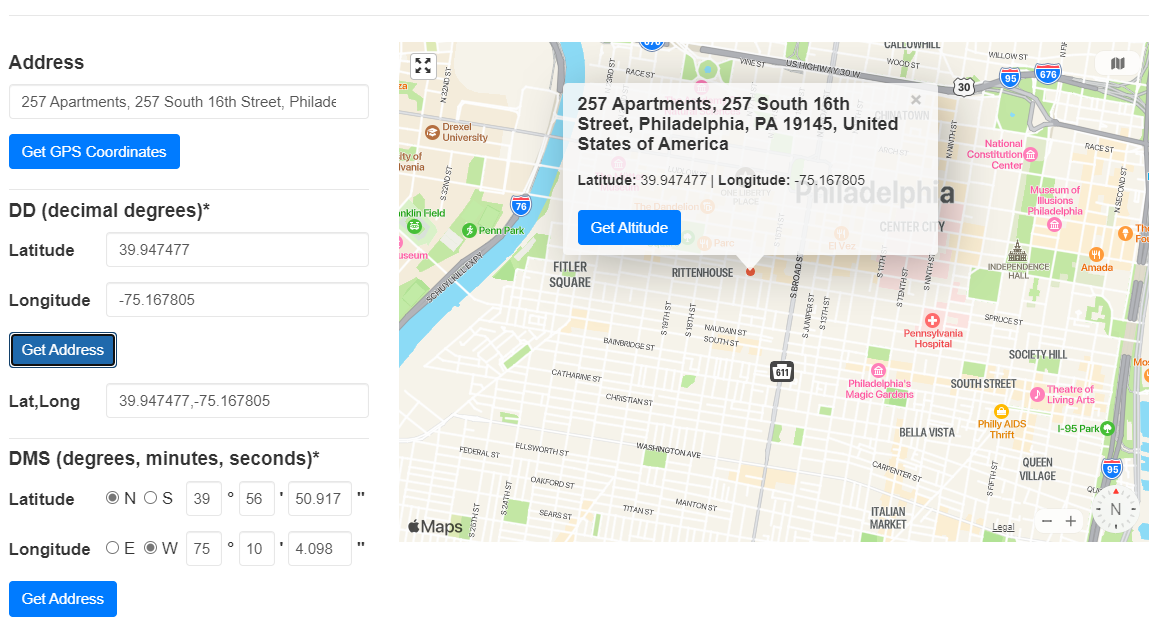